<a href="https://colab.research.google.com/github/austinkirwin/public-projects/blob/main/Python_projects/RandomForest/RandomForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Random Forest Models

Throughout this notebook I will be learning and applying the concepts of Random Forest Models.

## Learning

In [152]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import random

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

### What are the imports for

- **RandomForestClassifier** fits a number of decision trees on subsets of the data
- **accuracy_score** and **precision_score** are used to check how accurate the model is
- **confusion_matrix** and **ConfusionMatrixDisplay** helps see properly labelled responses as well as compare false positives and negatives
- **recall_score** is used to report the proportion of true postives
- **RandomizedSearchCV** is used for hyperparameter tuning
- **train_test_split** for splitting data

Other imports are visualization or helper functions

In [134]:
# Data set
drugs = pd.read_csv("https://raw.githubusercontent.com/austinkirwin/public-projects/refs/heads/main/Python_projects/RandomForest/drug200.csv")
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [135]:
# Mapping Non-int values to int

drugs['Sex'] = drugs['Sex'].map({'M':1, 'F':0})
drugs['BP'] = drugs['BP'].map({'HIGH':1, 'NORMAL':0, 'LOW':-1}) # Make sure the values being mapped from are exactly as in the data
drugs['Cholesterol'] = drugs['Cholesterol'].map({'HIGH':1, 'NORMAL':0})
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,1,25.355,DrugY
1,47,1,-1,1,13.093,drugC
2,47,1,-1,1,10.114,drugC
3,28,0,0,1,7.798,drugX
4,61,0,-1,1,18.043,DrugY


In [136]:
# Splitting the data
predictors = drugs.drop('Drug', axis =1)
response = drugs['Drug']

X_train, X_test, Y_train, Y_test = train_test_split(predictors, response, test_size = .2)
X_train.head(), Y_train.head()

(     Age  Sex  BP  Cholesterol  Na_to_K
 44    50    0   0            0   12.295
 163   21    0   1            0   28.632
 149   22    1  -1            1    8.151
 73    41    0   0            0   22.905
 187   47    1   1            1   10.403,
 44     drugX
 163    DrugY
 149    drugC
 73     DrugY
 187    drugA
 Name: Drug, dtype: object)

In [137]:
# Fitting and predicting
random.seed(111)
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)

In [138]:
# Checking accuracy of model
accuracy_score(Y_test, Y_pred)

1.0

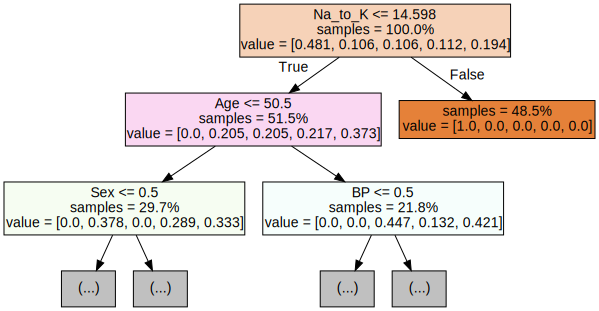

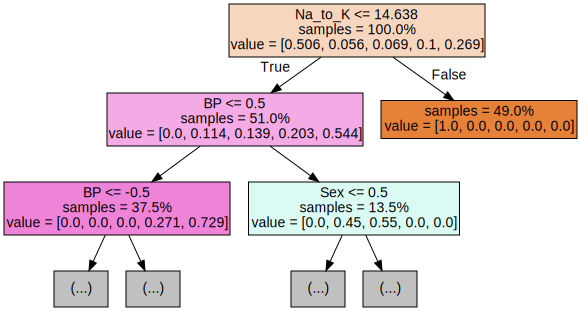

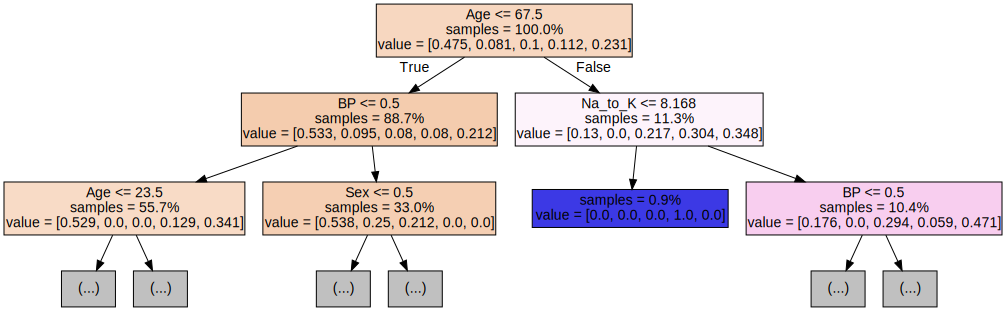

In [139]:
# Visualizing the first 3 trees
for i in range(3):
    tree = forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Tuning Hyperparameters

- Changing **n_estimators** changes # of decision trees
- Changing **max_depth** changes the depth of the trees

In [140]:
### Tuning

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
newForest = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(newForest,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df285b32810>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df2858b3cd0>})

Output the best estimator was and what the associated **max_depth** and **n_estimators** are.

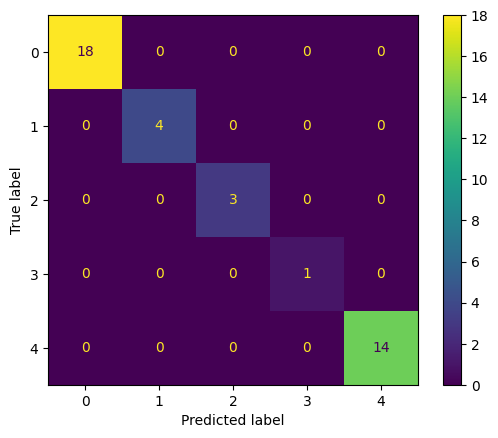

In [141]:
# Predicting with best estimator
bestForest = rand_search.best_estimator_

Y_pred = bestForest.predict(X_test)

# Making Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(cm).plot()

In [142]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average = 'weighted')
recall = recall_score(Y_test, Y_pred, average = 'weighted')
print(accuracy, precision, recall)

1.0 1.0 1.0


There is a moderate improvement in the accuracy of the model (~12.5%) at the time of running.

## Application

In [158]:
# Data set
mushrooms = pd.read_csv("https://raw.githubusercontent.com/austinkirwin/public-projects/refs/heads/main/Python_projects/RandomForest/mushrooms.csv")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Since there are lots of variables, it may be necessary to do dimensionality reduction after mapping the values.

In [159]:
# Dropping response var
predictors = mushrooms.drop("class", axis = 1)

# Mapping values for tree
predictors['cap-shape'] = predictors['cap-shape'].map({'b':0, 'c':1, 'x':2, 'f':3, 'k':4, 's':5})
predictors['cap-surface'] = predictors['cap-surface'].map({'f':0, 'g':1, 'y':2, 's':3})
predictors['cap-color'] = predictors['cap-color'].map({'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w': 8, 'y':9})
predictors['bruises'] = predictors['bruises'].map({'t':0, 'f':1})
predictors['odor'] = predictors['odor'].map({'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8})
predictors['gill-attachment'] = predictors['gill-attachment'].map({'a':0, 'd':1, 'f':2, 'n':3})
predictors['gill-spacing'] = predictors['gill-spacing'].map({'c':0, 'w':1, 'd':2})
predictors['gill-size'] = predictors['gill-size'].map({'b':0, 'n':1})
predictors['gill-color'] = predictors['gill-color'].map({'k':0, 'n':1, 'b':2, 'h':3, 'g':4, 'r':5, 'o':6, 'p':7, 'u':8, 'e':9, 'w':10, 'y':11})
predictors['stalk-shape'] = predictors['stalk-shape'].map({'e':0, 't':1})
predictors['stalk-root'] = predictors['stalk-root'].map({'b':0, 'c':1, 'u':2, 'e':3, 'z':4, 'r':5, '?':6})
predictors['stalk-surface-above-ring'] = predictors['stalk-surface-above-ring'].map({'f':0, 'y':1, 'k':2, 's':3})
predictors['stalk-surface-below-ring'] = predictors['stalk-surface-below-ring'].map({'f':0, 'y':1, 'k':2, 's':3})
predictors['stalk-color-above-ring'] = predictors['stalk-color-above-ring'].map({'n':0, 'b':1, 'c':2, 'g':3, 'o':4, 'p':5, 'e':6, 'w':7, 'y':8})
predictors['stalk-color-below-ring'] = predictors['stalk-color-below-ring'].map({'n':0, 'b':1, 'c':2, 'g':3, 'o':4, 'p':5, 'e':6, 'w':7, 'y':8})
predictors['veil-type'] = predictors['veil-type'].map({'p':0, 'u':1})
predictors['veil-color'] = predictors['veil-color'].map({'n':0, 'o':1, 'w':2, 'y':3})
predictors['ring-number'] = predictors['ring-number'].map({'n':0, 'o':1, 't':2})
predictors['ring-type'] = predictors['ring-type'].map({'c':0, 'e':1, 'f':2, 'l':3, 'n':4, 'p':5, 's':6, 'z':7})
predictors['spore-print-color'] = predictors['spore-print-color'].map({'k':0, 'n':1, 'b':2, 'h':3, 'r':4, 'o':5, 'u':6, 'w':7, 'y':8})
predictors['population'] = predictors['population'].map({'a':0, 'c':1, 'n':2, 's':3, 'v':4, 'y':5})
predictors['habitat'] = predictors['habitat'].map({'g':0, 'l':1, 'm':2, 'p':3, 'u':4, 'w':5, 'd':6})
predictors.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,2,0,1,0,0,...,3,7,7,0,2,1,5,0,3,4
1,2,3,9,0,0,2,0,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,0,3,8,0,1,2,0,0,1,0,...,3,7,7,0,2,1,5,1,2,2
3,2,2,8,0,7,2,0,1,1,0,...,3,7,7,0,2,1,5,0,3,4
4,2,3,3,1,6,2,1,0,0,1,...,3,7,7,0,2,1,1,1,0,0


In [161]:
response = mushrooms['class']
# Splitting the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(predictors, response, test_size=.2)
# Initialize
newForest = RandomForestClassifier()
# Fit
newForest.fit(Xtrain, Ytrain)
# Predict
Ypred = newForest.predict(Xtest)
# Get score
accuracy_score(Ypred, Ytest)

1.0

Magically, the accuracy score is 1.0 at the time of running (04.09.2025)